In [1]:
#What year had the most blooms/highest bacteria/worst year?

In [2]:
%matplotlib inline

In [2]:
import pandas as pd
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt

Culture Data

In [4]:
##Culture data import
culturedata = pd.read_csv("Cleaned_Date_Culture_Data.csv")

In [5]:
culturedata["Date"] = pd.to_datetime(culturedata["Sample Date"],format= "%Y-%m-%d")
culturedata["Date"] = pd.to_datetime(culturedata["Sample Date"], yearfirst=True)

In [6]:
culturedata["Year"] = pd.DatetimeIndex(culturedata["Date"]).year

In [7]:
culturedata.head()

,Unnamed: 0,Culture Test ID,Culture Sample 1 Timestamp,Beach,Culture Sample 1 Reading,Culture Sample 2 Reading,Culture Reading Mean,Latitude,Longitude,Sample Date,Sample Time,Date,Year
0,2231,113666.0,2016-08-04 08:30:00,Humboldt,1.0,1.0,1.0,41.90643,-87.703717,2016-08-04,08:30:00,2016-08-04,2016
1,2374,112689.0,2016-06-01 07:15:00,Calumet,629.0,1300.0,904.3,41.71420,-87.529900,2016-06-01,07:15:00,2016-06-01,2016
2,2375,112669.0,2016-06-01 08:00:00,Calumet,345.0,517.0,422.3,41.71420,-87.529900,2016-06-01,08:00:00,2016-06-01,2016
3,4980,109008.0,2013-05-26 00:00:00,57th Street,17.0,20.0,18.4,41.79110,-87.579700,2013-05-26,00:00:00,2013-05-26,2013
4,4983,93134.0,2015-07-07 00:00:00,Leone,727.0,727.0,727.0,42.01310,-87.663500,2015-07-07,00:00:00,2015-07-07,2015


In [8]:
culturedata["Culture Reading Mean"].max()

2420.0

In [9]:
groupedyear_c = culturedata.groupby(["Year"])

In [10]:
groupedyear_c.nunique()

,Unnamed: 0,Culture Test ID,Culture Sample 1 Timestamp,Beach,Culture Sample 1 Reading,Culture Sample 2 Reading,Culture Reading Mean,Latitude,Longitude,Sample Date,Sample Time,Date
Year,,,,,,,,,,,,
2006,1267,1267,74,20,389,392,795,18,18,74,1,74
2007,1320,1320,83,18,415,426,906,17,17,83,1,83
2008,1264,1264,81,18,381,383,734,17,17,81,1,81
2009,1423,1423,83,19,393,409,841,18,18,83,1,83
2010,1222,1222,76,17,378,386,752,17,17,76,1,76
2011,1327,1327,82,18,386,388,803,18,18,82,1,82
2012,1372,1372,94,18,384,388,813,18,18,94,1,94
2013,1394,1394,94,18,267,266,771,18,18,94,1,94
2014,1388,1388,93,18,228,234,743,18,18,93,1,93


In [11]:
groupedyear_c.sum()

,Unnamed: 0,Culture Test ID,Culture Sample 1 Reading,Culture Sample 2 Reading,Culture Reading Mean,Latitude,Longitude
Year,,,,,,,
2006,18545147,129603543.0,247133.7,246886.9,234436.9,53104.36990,-111018.405800
2007,18919359,132591967.0,301043.7,287293.8,276674.6,55318.48100,-115659.469500
2008,18676608,127563587.0,162481.0,159041.0,154449.3,52975.02070,-110753.964500
2009,20722519,133898115.0,241047.8,237677.0,226527.3,59628.95160,-124682.879700
2010,18087649,108693778.0,177138.3,188501.4,168811.8,51195.21880,-107066.952800
2011,19246711,126390940.0,209532.7,207459.9,188676.6,55599.24653,-116268.444739
2012,20097679,148563850.0,211358.1,207318.4,196159.9,57474.47659,-120206.566107
2013,20788617,149543300.0,238076.5,226182.4,219713.2,58400.04127,-122136.296241
2014,20231599,144056820.0,235748.8,232422.6,218625.3,58153.35006,-121612.246958


In [12]:
culture_yaxis = groupedyear_c["Culture Reading Mean"].mean()
culture_yaxis

Year
2006    185.033070
2007    209.601970
2008    122.190902
2009    159.189951
2010    138.143863
2011    142.182818
2012    142.973688
2013    157.613486
2014    157.511023
2015    139.970403
2016    125.999566
Name: Culture Reading Mean, dtype: float64

In [13]:
culture_xaxis = ["2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016"]

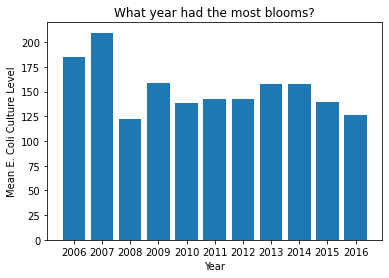

In [14]:
plt.bar(culture_xaxis, culture_yaxis)

plt.title("What year had the most blooms?")
plt.xlabel("Year")
plt.ylabel("Mean E. Coli Culture Level")

plt.show()

In [3]:
plt.savefig("output/Culture_Year_barchart.png")

<Figure size 432x288 with 0 Axes>

In [15]:
culture_labels = ["2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016"]

(0.0, 455.0)

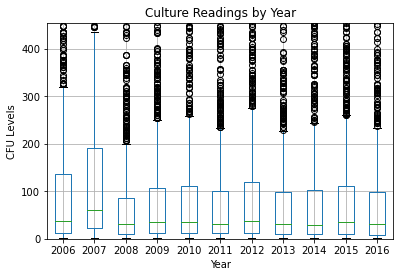

In [16]:
culutrebox = culturedata.boxplot(column= ["Culture Reading Mean"], by =["Year"])
plt.title("Culture Readings by Year")
plt.suptitle("")
plt.show
plt.xlabel("Year")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11], culture_labels )
plt.ylabel("CFU Levels")
plt.ylim(0,455)

In [4]:
plt.savefig("output/Culture_Year_boxplot.png")

<Figure size 432x288 with 0 Axes>

DNA DATA

In [17]:
dnadata = pd.read_csv("Cleaned_Date_DNA_Data.csv")
dnadata

,Unnamed: 0,DNA Test ID,DNA Sample Timestamp,Beach,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude,Sample Date,Sample Time
0,3,10601.0,2019-06-03 12:08:00,63rd Street,15.0,121.0,42.6,41.78270,-87.574800,2019-06-03,12:08:00
1,4,10600.0,2019-06-03 12:08:00,South Shore,1006.0,16.0,126.9,41.76890,-87.563600,2019-06-03,12:08:00
2,5,10582.0,2019-06-03 12:10:00,North Avenue,69.0,8.0,23.5,41.91480,-87.627300,2019-06-03,12:10:00
3,6,10646.0,2019-06-03 12:12:00,Howard,90.0,169.0,123.3,42.01880,-87.666300,2019-06-03,12:12:00
4,7,10599.0,2019-06-03 12:08:00,Rainbow,150.0,245.0,191.7,41.75800,-87.551000,2019-06-03,12:08:00
...,...,...,...,...,...,...,...,...,...,...,...
6856,24273,3116.0,2017-06-21 00:00:00,Humboldt,1083.0,1028.0,1055.1,41.90643,-87.703717,2017-06-21,00:00:00
6857,24274,7874.0,2018-07-11 00:00:00,Howard,198.0,642.0,356.5,42.01880,-87.666300,2018-07-11,00:00:00
6858,24277,2047.0,2016-08-24 13:13:00,North Avenue,47.0,13.0,24.7,41.91480,-87.627300,2016-08-24,13:13:00
6859,24279,2980.0,2017-06-18 00:00:00,57th Street,10.0,84.0,29.0,41.79110,-87.579700,2017-06-18,00:00:00


In [18]:
dnadata["Date"] = pd.to_datetime(dnadata["Sample Date"],format= "%Y-%m-%d")
dnadata["Date"] = pd.to_datetime(dnadata["Sample Date"], yearfirst=True)

In [19]:
dnadata["Year"] = pd.DatetimeIndex(dnadata["Date"]).year

In [20]:
dnadata.head()

,Unnamed: 0,DNA Test ID,DNA Sample Timestamp,Beach,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude,Sample Date,Sample Time,Date,Year
0,3,10601.0,2019-06-03 12:08:00,63rd Street,15.0,121.0,42.6,41.7827,-87.5748,2019-06-03,12:08:00,2019-06-03,2019
1,4,10600.0,2019-06-03 12:08:00,South Shore,1006.0,16.0,126.9,41.7689,-87.5636,2019-06-03,12:08:00,2019-06-03,2019
2,5,10582.0,2019-06-03 12:10:00,North Avenue,69.0,8.0,23.5,41.9148,-87.6273,2019-06-03,12:10:00,2019-06-03,2019
3,6,10646.0,2019-06-03 12:12:00,Howard,90.0,169.0,123.3,42.0188,-87.6663,2019-06-03,12:12:00,2019-06-03,2019
4,7,10599.0,2019-06-03 12:08:00,Rainbow,150.0,245.0,191.7,41.7580,-87.5510,2019-06-03,12:08:00,2019-06-03,2019


In [29]:
dnadata = dnadata[dnadata["Year"]!= 2020]

In [30]:
groupedyear_d = dnadata.groupby(["Year"])

In [31]:
groupedyear_d.nunique()

,Unnamed: 0,DNA Test ID,DNA Sample Timestamp,Beach,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude,Sample Date,Sample Time,Date
Year,,,,,,,,,,,,
2015,271,270,54,5,259,263,204,5,5,54,1,54
2016,626,625,269,9,305,297,541,9,9,70,126,70
2017,1995,1995,119,20,831,826,1640,20,20,102,21,102
2018,1959,1959,166,20,931,902,1695,20,20,102,60,102
2019,1963,1963,925,20,642,636,1388,20,20,102,145,102


In [32]:
groupedyear_d.sum()

,Unnamed: 0,DNA Test ID,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude
Year,,,,,,,
2015,4040421,36654.0,117240.0,164146.9,105401.0,11327.18020,-23731.872200
2016,8256264,831065.0,162055.0,187252.0,146708.9,26187.35990,-54831.572000
2017,28965557,8140867.0,1423826.0,1415619.0,1201150.9,83587.29546,-174806.603834
2018,28511666,15742931.0,2381393.0,1884195.0,1731629.5,82078.22020,-171651.969400
2019,4548950,23768312.0,710925.0,675143.0,569081.9,82243.37129,-172000.164911


In [33]:
dna_yaxis = groupedyear_d["DNA Reading Mean"].mean()
dna_yaxis

Year
2015    388.933579
2016    234.359265
2017    602.080652
2018    883.935426
2019    289.904177
Name: DNA Reading Mean, dtype: float64

In [36]:
dna_xaxis = ["2015", "2016", "2017", "2018", "2019"]

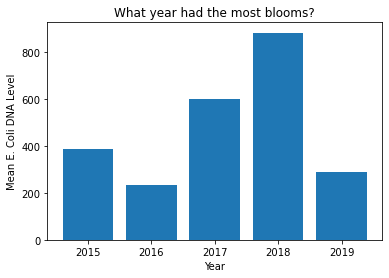

In [37]:
plt.bar(dna_xaxis, dna_yaxis)

plt.title("What year had the most blooms?")
plt.xlabel("Year")
plt.ylabel("Mean E. Coli DNA Level")

plt.show()

In [5]:
plt.savefig("output/DNA_Year_barchart.png")

<Figure size 432x288 with 0 Axes>

In [38]:
dna_labels = ["2015", "2016", "2017", "2018", "2019"]

(0.0, 1400.0)

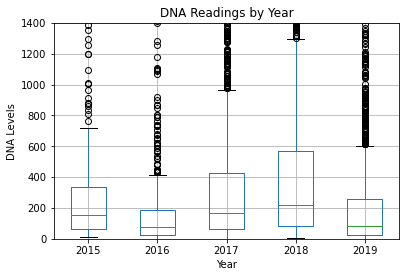

In [41]:
dnabox = dnadata.boxplot(column= ["DNA Reading Mean"], by =["Year"])
plt.title("DNA Readings by Year")
plt.suptitle("")
plt.show
plt.xlabel("Year")
plt.xticks([1,2,3,4,5], dna_labels )
plt.ylabel("DNA Levels")
plt.ylim(0,1400)

In [6]:
plt.savefig("output/DNA_Year_boxplot.png")

<Figure size 432x288 with 0 Axes>